# Comprehensive Analysis of BMW Auction Data: Identifying Key Trends and Insights

After collecting our data from an online auction platform filtered for only BMW vehicles, we will analyze the dataset to uncover trends and answer key questions that will guide us in identifying the best BMW vehicles. It is essential to ask the right questions and derive accurate insights to ensure that our analysis leads to well-founded conclusions. This process will allow us to make informed decisions based on a deeper understanding of the data. To begin, we will outline the key questions that will help us navigate and interpret the dataset effectively.

**Define goals:**

* Best Locations for Vehicles: Determine which states or locations offer the best vehicles based on average price, year, and mileage.

* Best Day to Purchase a Vehicle: Analyze trends to identify the most favorable day for buying a vehicle.

* Auction Bidding vs. Buy Now Option: Assess whether bidding at auctions provides better deals compared to the "Buy Now" option.

* Optimal Trim-Year-Mileage-Price Combination: Identify the best balance of trim, year, mileage, and price.

* Condition vs. Mileage Correlation: Examine whether higher mileage reduces the likelihood of a vehicle being in a "Run and Drive" condition.

* Correlation Analysis: Explore relationships between damage, trim, mileage, and price to understand their impact on vehicle valuation.

Understanding the Variables in Our Dataset:

*Note: this list inludes only final, preprocessed variables*

* *VIN* - the unique vehicle identification;
* *Trim* - the specific model variant of the vehicle;
* *Year* - the manufacturing year of the vehicle;
* *Mileage* - the total distance traveled by the vehicle;
* *Auction Name* - the name of the auction (IAAI or Copart);
* *State* - the U.S. state in which the auction took place;
* *Condition* - the overall condition of the vehicle as assessed during the auction;
* *Damage Type* - the type of damage the vehicle has sustained;
* *Damage Location* - the specific area or part of the vehicle that was damaged;
* *Auction Type* - indicates whether the auction was a "Buy Now" or "Bidding" type;
* *Date of Sale* - the date on which the vehicle was sold at auction;
* *Day of Sale* - the specific day of the week on which the vehicle was sold;
* *Selelr* - the entity or individual who listed the vehicle for sale at the auction;
* *Price* - the final sale price of the vehicle at auction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Scrubbing

### First dataset scrubbing

In [5]:
# Read dataset
df = pd.read_csv('/content/bidcars.csv')

In [6]:
df

,Name,Price,Auction Name,Date of Sale,Condition,VIN,Mileage,Seller,Documents,Key,Location,Damage,Auction Type,Transmission
0,"2017 BMW 3 Series, 330I","Final bid: $6,500",iaai,"Wed 25 December, 2024",Run and Drive,WBA8B9G54HNU49082,Milage: 72k miles (116k km),Seller: Progressive Casualty Insurance,Sale doc.: Original (Texas),Key Present,Location: Fort Worth... (TX),Damage: Collision | Front end,Sold by Buy Now,Automatic
1,"2015 BMW 3 Series, 328I Xdrive",Final bid: ---,iaai,"Wed 25 December, 2024",Run and Drive,WBA3B5C53FF960086,Milage: 115k miles (185k km),Seller: Geico Insurance,Sale doc.: Mv-907a (New york),Key Present,Location: Newburgh (NY),Damage: Collision | Right front,Past Auction,Automatic
2,"2016 BMW 3 Series, 328 Xi Sulev","Final bid: $2,000",copart,"Wed 25 December, 2024",Run and Drive,WBA8E3G53GNU02578,Milage: 165k miles (265k km),Seller: State Farm Insurance,Sale doc.: ST (Alabama),Key Present,Location: Mobile (AL),Damage: Front end,Sold by Buy Now,Automatic
3,"2015 BMW 3 Series, 328 I Sulev","Final bid: $2,800",copart,"Tue 24 December, 2024",Run and Drive,WBA3C1C5XFK120450,Milage: 113k miles (182k km),Seller: Non-insurance Company,Sale doc.: CT (Texas),Key Present,Location: San Antonio (TX),Damage: Front end,Sold by Buy Now,Automatic
4,"2017 BMW 3 Series, 330I Xdrive","Final bid: $2,500",iaai,"Tue 24 December, 2024",Stationary,WBA8D9G37HNU62921,Milage: 129k miles (208k km),Seller: Progressive Casualty Insurance,Sale doc.: Rebuildable (Florida),Key Present,Location: Clearwater (FL),Damage: Water | Flood,Sold by Buy Now,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"2019 BMW 3 Series, 330I","Final bid: $8,000",copart,"Wed 4 December, 2024",Run and Drive,WBA5R1C58KAE81833,Milage: 42k miles (67k km),Seller: Csaa,Sale doc.: SC (California),Key Present,Location: San Jose (CA),Damage: Front end,Past Auction,Automatic
996,"2016 BMW 3 Series, 328 I Sulev","Final bid: $1,700",copart,"Wed 4 December, 2024",No information,WBA8E9C53GK648685,Milage: 94k miles (151k km),Seller: Csaa,Sale doc.: SC (California),Key Present,Location: San Jose (CA),Damage: Front end,Past Auction,Automatic
997,"2015 BMW 3 Series, 328 XI","Final bid: $3,950",copart,"Wed 4 December, 2024",Run and Drive,WBA3B3G53FNT17192,Milage: 109k miles (175k km),Seller: Non-insurance Company,Sale doc.: CT (Connecticut),Key Present,Location: Hartford S... (CT),Damage: Minor dent / scratches,Past Auction,Automatic
998,"2013 BMW 3 Series, 328 XI","Final bid: $2,350",copart,"Wed 4 December, 2024",No information,WBA3B3G59DNR79503,Milage: 116k miles (186k km),Seller: Non-insurance Company,Sale doc.: CT (Minnesota),Key Present,Location: Minneapolis (MN),Damage: Mechanical,Past Auction,Automatic


In [7]:
# Data scrubbing
#   Fixing datatypes, data inconsistency, etc.
df['Year'] = df['Name'].apply(lambda x: next((word for word in x.split() if word.isdigit() and len(word) == 4), None))

df['Trim'] = df['Name'].str.split(',').str[1]

df['Price'] = df['Price'].str.split(':').str[1].str.strip().apply(lambda x: x.replace('$', '').replace(',', '') if x != '---' else x)

df['Day of Sale'] = df['Date of Sale'].str[1:4]

df['Date of Sale'] = pd.to_datetime(df['Date of Sale'].str[4:])

df['Series'] = df['Name'].str.split(',').str[1].str[1:4]

df['Trim'] = 'I'
df.loc[df['Name'].str.contains('X') & df['Name'].str.contains('Sulev'), 'Trim'] = 'Xdrive Sulev'
df.loc[df['Name'].str.contains('X') & ~df['Name'].str.contains('Sulev'), 'Trim'] = 'Xdrive'
df['Trim'] = df['Series'] + ' ' + df['Trim']
df[df['Trim'] == 'I I'] = 'I'
df[df['Trim'] == 'I S I'] = 'I Sulev'
df = df[~df['Trim'].isin(['I', 'I Sulev'])].reset_index(drop=True)

df['Mileage'] = df['Mileage'].str.split(" ").str[1].str.replace('k', '000')

df['Seller'] = df['Seller'].str.split(':').str[1]

df['Location'] = df['Location'].str.replace('(', '').str.replace(')', '').str.split(' ')
df['State'] = df['Location'].str[-1]

df['Damage'] = df['Damage'].str.split(':')
df['Damage Type'] = df['Damage'].str[-1].apply(lambda x: x.split('|')[0] if "|" in x else 'No Information').str.strip()
df['Damage Location'] = df['Damage'].str[-1].str.split('|').str[-1].str.strip()

df['Auction Type'] = df['Auction Type'].apply(lambda x: 'Buy Now' if 'Buy Now' in x else 'Auction')

df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
df = df[df['Date of Sale'] > '2024-12-04']

<ipython-input-7-cb09ab8cc79b>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'I' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df[df['Trim'] == 'I I'] = 'I'


In [8]:
df['Trim'].unique()

array(['330 I', '328 Xdrive', '328 Xdrive Sulev', '328 I', '330 Xdrive',
       '340 Xdrive', '320 Xdrive', '320 I', '335 I', '335 Xdrive',
       '340 I'], dtype=object)

In [9]:
# Drop uneccessary columns
df = df.drop(['Name' ,'Series', 'Location', 'Damage', 'Documents', 'Transmission', 'Key'], axis = 1)

In [10]:
# Reorganize columns
df = df[['VIN', 'Trim', 'Year', 'Mileage', 'Auction Name', 'State',
         'Condition', 'Damage Type', 'Damage Location',
         'Auction Type', 'Date of Sale', 'Day of Sale', 'Seller', 'Price']]

In [11]:
df

,VIN,Trim,Year,Mileage,Auction Name,State,Condition,Damage Type,Damage Location,Auction Type,Date of Sale,Day of Sale,Seller,Price
0,WBA8B9G54HNU49082,330 I,2017,72000,iaai,TX,Run and Drive,Collision,Front end,Buy Now,2024-12-25,Wed,Progressive Casualty Insurance,6500
1,WBA3B5C53FF960086,328 Xdrive,2015,115000,iaai,NY,Run and Drive,Collision,Right front,Auction,2024-12-25,Wed,Geico Insurance,---
2,WBA8E3G53GNU02578,328 Xdrive Sulev,2016,165000,copart,AL,Run and Drive,No Information,Front end,Buy Now,2024-12-25,Wed,State Farm Insurance,2000
3,WBA3C1C5XFK120450,328 I,2015,113000,copart,TX,Run and Drive,No Information,Front end,Buy Now,2024-12-24,Tue,Non-insurance Company,2800
4,WBA8D9G37HNU62921,330 Xdrive,2017,129000,iaai,FL,Stationary,Water,Flood,Buy Now,2024-12-24,Tue,Progressive Casualty Insurance,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,WBA5R1C53KAK06786,330 I,2019,61000,iaai,CA,Run and Drive,Collision,Left side,Buy Now,2024-12-05,Thu,Non-insurance Company,11100
986,WBA8B3G53GNT91963,340 I,2016,167000,iaai,CA,Run and Drive,Other,Vandalized,Buy Now,2024-12-05,Thu,State Farm Group Insurance,5975
987,WBA3B3C50DF543316,328 Xdrive,2013,123000,copart,MI,Run and Drive,No Information,Side,Auction,2024-12-05,Thu,State Farm Insurance,---
988,WBA3A5C56DF357455,328 I,2013,142000,iaai,TX,Stationary,Collision,Front end,Buy Now,2024-12-05,Thu,Progressive Casualty Insurance,575


In [12]:
# Read second dataset
df2 = pd.read_csv('bidcars2.csv')

In [13]:
df2

,Name,Price,Auction Type,Date of Sale,Sold by,Condition,Mileage,Seller,Location,Damage,Transmission,VIN,Auction Name,Documents
0,"2016 BMW 3 Series, 320 I","$3,700",Sold by Buy Now,"Tue 10 December, 2024",NaN,Run and Drive,73k miles (117k km),Insurance Company,Los Angeles (CA),Front end,NaN,WBA8E1G57GNT34225,copart,SC (California)
1,"2015 BMW 3 Series, 320I Xdrive","$4,800",Past auctions,"Tue 10 December, 2024",NaN,Run and Drive,162k miles (261k km),Non-insurance C...,Memphis (TN),Other | Rear,NaN,WBA3C3G5XFNS72880,iaai,Clear (Tennessee)
2,"2015 BMW 3 Series, 328 I Sulev","$3,600",Past auctions,"Tue 10 December, 2024",NaN,Run and Drive,81k miles (130k km),Insurance Company,Rancho Cuc... (CA),Roof,NaN,WBA3C1C55FK122882,copart,SC (Pennsylvania)
3,"2014 BMW 3 Series, 328 I Sulev","$4,050",Past auctions,"Tue 10 December, 2024",NaN,Run and Drive,73k miles (118k km),Insurance Company,Van Nuys (CA),Side,NaN,WBA3C1C52EK108680,copart,SC (California)
4,"2016 BMW 3 Series, 328 I Sulev","$4,000",Past auctions,"Tue 10 December, 2024",NaN,Starts,78k miles (126k km),Csaa,San Jose (CA),Front end,NaN,WBA8E9C56GK645795,copart,SC (California)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,"2019 BMW 3 Series, 330I Xdrive",---,Past auctions,"Wed 27 November, 2024",NaN,Run and Drive,66k miles (106k km),Progressive Cas...,Scranton (PA),Collision | Left side,NaN,3MW5R7J53K8B01294,iaai,Salvage (Pennsylvania)
648,"2014 BMW 3 Series, 328 I",---,Past auctions,"Wed 27 November, 2024",NaN,Run and Drive,101k miles (163k km),Non-insurance C...,Las Vegas... (NV),Normal wear,NaN,WBA3A5G5XENP30627,copart,RT (Nevada)
649,"2015 BMW 3 Series, 328 Xi Sulev","$2,400",Sold by Buy Now,"Wed 27 November, 2024",NaN,No information,124k miles (199k km),Non-insurance C...,Fredericks... (VA),Minor dent / scratches,NaN,WBA3B5G59FNS20610,copart,CT (Virginia)
650,"2018 BMW 3 Series, 320 I","$2,125",Sold by Buy Now,"Wed 27 November, 2024",NaN,Run and Drive,80k miles (128k km),State Farm Insu...,North Char... (SC),Front end,NaN,WBA8E1G55JNU91338,copart,ST (South Carolina)


### Second dataset scrubbing

In [14]:
# Data scrubbing
#   Fixing datatypes, data inconsistency, etc.
df2['Year'] = df2['Name'].apply(lambda x: next((word for word in x.split() if word.isdigit() and len(word) == 4), None))

df2['Trim'] = df2['Name'].str.split(',').str[1]

df2['Price'] = df2['Price'].str.strip().apply(lambda x: x.replace('$', '').replace(',', '') if x != '---' else x)

df2['Day of Sale'] = df2['Date of Sale'].str[1:4]

df2['Date of Sale'] = pd.to_datetime(df2['Date of Sale'].str[4:])

df2['Series'] = df2['Name'].str.split(',').str[1].str[1:4]

df2['Trim'] = 'I'
df2.loc[df2['Name'].str.contains('X') & df2['Name'].str.contains('Sulev'), 'Trim'] = 'Xdrive Sulev'
df2.loc[df2['Name'].str.contains('X') & ~df2['Name'].str.contains('Sulev'), 'Trim'] = 'Xdrive'
df2['Trim'] = df2['Series'] + ' ' + df2['Trim']
df2[df2['Trim'] == 'I I'] = 'I'
df2[df2['Trim'] == 'I S I'] = 'I Sulev'
df2 = df2[~df2['Trim'].isin(['I', 'I Sulev'])].reset_index(drop=True)

df2['Mileage'] = df2['Mileage'].str.split(" ").str[0].str.replace('k', '000')

df2['Location'] = df2['Location'].str.replace('(', '').str.replace(')', '').str.split(' ')
df2['State'] = df2['Location'].str[-1]

df2['Damage Type'] = df2['Damage'].apply(lambda x: x.split('|')[0] if "|" in x else 'No Information').str.strip()
df2['Damage Location'] = df2['Damage'].str.split('|').str[-1]
df2['Damage Location'] = df2['Damage Location'].str.strip()

df2['Auction Type'] = df2['Auction Type'].apply(lambda x: 'Buy Now' if 'Buy Now' in x else 'Auction')

df2['Date of Sale'] = pd.to_datetime(df2['Date of Sale'])
df2 = df2[df2['Date of Sale'] < '2024-12-05 00:00:00']


<ipython-input-14-cb168fcb60d4>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'I Sulev' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df2[df2['Trim'] == 'I S I'] = 'I Sulev'
<ipython-input-14-cb168fcb60d4>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'I Sulev' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2[df2['Trim'] == 'I S I'] = 'I Sulev'
<ipython-input-14-cb168fcb60d4>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'I Sulev' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2[df2['Trim'] == 'I S I'] = 'I Sulev'


In [15]:
# Drop uneccessary columns
df2 = df2.drop(['Name' ,'Sold by', 'Series', 'Location', 'Damage', 'Documents', 'Transmission'], axis = 1)

In [16]:
df2.head()

,Price,Auction Type,Date of Sale,Condition,Mileage,Seller,VIN,Auction Name,Year,Trim,Day of Sale,State,Damage Type,Damage Location
251,2350,Auction,2024-12-04,Run and Drive,90000,Csaa,WBA3C1C58DF438072,copart,2013,328 I,Wed,CA,No Information,Front end
252,4000,Auction,2024-12-04,Run and Drive,42000,Geico,WBA8A9C58HK620037,copart,2017,320 I,Wed,CA,No Information,Front end
253,2500,Auction,2024-12-04,No information,102000,Non-insurance C...,WBAKE5C53DJ107510,copart,2013,328 I,Wed,CA,No Information,Minor dent / scratches
254,675,Auction,2024-12-04,Run and Drive,101000,Insurance Company,WBA3C1C50DF443167,copart,2013,328 I,Wed,CA,No Information,Front end
255,8000,Auction,2024-12-04,Run and Drive,42000,Csaa,WBA5R1C58KAE81833,copart,2019,330 I,Wed,CA,No Information,Front end


In [17]:
# Concatinate dataframes
combined_df = pd.concat([df, df2])

# Drop duplicate rows
unique_df = combined_df.drop_duplicates()

# Reset index if needed
unique_df.reset_index(drop=True, inplace=True)

In [18]:
unique_df = unique_df[unique_df['Price'] != '---']
unique_df.reset_index(drop=True, inplace=True)
unique_df

,VIN,Trim,Year,Mileage,Auction Name,State,Condition,Damage Type,Damage Location,Auction Type,Date of Sale,Day of Sale,Seller,Price
0,WBA8B9G54HNU49082,330 I,2017,72000,iaai,TX,Run and Drive,Collision,Front end,Buy Now,2024-12-25,Wed,Progressive Casualty Insurance,6500
1,WBA8E3G53GNU02578,328 Xdrive Sulev,2016,165000,copart,AL,Run and Drive,No Information,Front end,Buy Now,2024-12-25,Wed,State Farm Insurance,2000
2,WBA3C1C5XFK120450,328 I,2015,113000,copart,TX,Run and Drive,No Information,Front end,Buy Now,2024-12-24,Tue,Non-insurance Company,2800
3,WBA8D9G37HNU62921,330 Xdrive,2017,129000,iaai,FL,Stationary,Water,Flood,Buy Now,2024-12-24,Tue,Progressive Casualty Insurance,2500
4,WBA8B7G58GNT96003,340 Xdrive,2016,86000,copart,CO,Run and Drive,No Information,Front end,Buy Now,2024-12-24,Tue,Progressive,9650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,WBA8E1G57GNT38193,320 I,2016,88000,iaai,FL,Stationary,Water,Flood,Buy Now,2024-11-27,Wed,Progressive Cas...,2500
1277,WBA3A5C52DF354889,328 I,2013,144000,iaai,MD,Stationary,Collision,Front end,Buy Now,2024-11-27,Wed,Progressive Cas...,750
1278,WBA3B5G59FNS20610,328 Xdrive Sulev,2015,124000,copart,VA,No information,No Information,Minor dent / scratches,Buy Now,2024-11-27,Wed,Non-insurance C...,2400
1279,WBA8E1G55JNU91338,320 I,2018,80000,copart,SC,Run and Drive,No Information,Front end,Buy Now,2024-11-27,Wed,State Farm Insu...,2125


In [19]:
# Save new dataset as separate csv for future needs
unique_df.to_csv('bidcars_full.csv', index=False)

## Data Analysis

### Final minor data cleaning

In [20]:
# Read new, preprocessed dataset
df = pd.read_csv('/content/bidcars_full.csv')

In [21]:
df

,VIN,Trim,Year,Mileage,Auction Name,State,Condition,Damage Type,Damage Location,Auction Type,Date of Sale,Day of Sale,Seller,Price
0,WBA8B9G54HNU49082,330 I,2017,72000,iaai,TX,Run and Drive,Collision,Front end,Buy Now,2024-12-25,Wed,Progressive Casualty Insurance,6500
1,WBA8E3G53GNU02578,328 Xdrive Sulev,2016,165000,copart,AL,Run and Drive,No Information,Front end,Buy Now,2024-12-25,Wed,State Farm Insurance,2000
2,WBA3C1C5XFK120450,328 I,2015,113000,copart,TX,Run and Drive,No Information,Front end,Buy Now,2024-12-24,Tue,Non-insurance Company,2800
3,WBA8D9G37HNU62921,330 Xdrive,2017,129000,iaai,FL,Stationary,Water,Flood,Buy Now,2024-12-24,Tue,Progressive Casualty Insurance,2500
4,WBA8B7G58GNT96003,340 Xdrive,2016,86000,copart,CO,Run and Drive,No Information,Front end,Buy Now,2024-12-24,Tue,Progressive,9650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,WBA8E1G57GNT38193,320 I,2016,88000,iaai,FL,Stationary,Water,Flood,Buy Now,2024-11-27,Wed,Progressive Cas...,2500
1277,WBA3A5C52DF354889,328 I,2013,144000,iaai,MD,Stationary,Collision,Front end,Buy Now,2024-11-27,Wed,Progressive Cas...,750
1278,WBA3B5G59FNS20610,328 Xdrive Sulev,2015,124000,copart,VA,No information,No Information,Minor dent / scratches,Buy Now,2024-11-27,Wed,Non-insurance C...,2400
1279,WBA8E1G55JNU91338,320 I,2018,80000,copart,SC,Run and Drive,No Information,Front end,Buy Now,2024-11-27,Wed,State Farm Insu...,2125


Before jumping to visualizations it is essential to gain a comprehensive overview of the dataset. This involves examining its structure, summary statistics, and potential data quality issues.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VIN              1281 non-null   object
 1   Trim             1281 non-null   object
 2   Year             1281 non-null   int64 
 3   Mileage          1281 non-null   int64 
 4   Auction Name     1281 non-null   object
 5   State            1281 non-null   object
 6   Condition        1281 non-null   object
 7   Damage Type      1281 non-null   object
 8   Damage Location  1281 non-null   object
 9   Auction Type     1281 non-null   object
 10  Date of Sale     1281 non-null   object
 11  Day of Sale      1281 non-null   object
 12  Seller           1281 non-null   object
 13  Price            1281 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 140.2+ KB


In [23]:
df.describe()

,Year,Mileage,Price
count,1281.000000,1281.000000,1281.000000
mean,2015.173302,209108.508977,2745.302108
std,1.768104,287098.752497,2373.789327
min,2013.000000,3000.000000,25.000000
25%,2014.000000,80000.000000,1100.000000
50%,2015.000000,110000.000000,2050.000000
75%,2016.000000,147000.000000,3550.000000
max,2019.000000,999000.000000,15250.000000


In [24]:
df.isna().sum()

,0
VIN,0
Trim,0
Year,0
Mileage,0
Auction Name,0
State,0
Condition,0
Damage Type,0
Damage Location,0
Auction Type,0


In [25]:
df.describe(include='object').T

,count,unique,top,freq
VIN,1281,1204,WBA5R1C5XKAE82000,2
Trim,1281,12,328 I,345
Auction Name,1281,2,copart,860
State,1281,44,CA,248
Condition,1281,4,Run and Drive,749
Damage Type,1281,7,No Information,860
Damage Location,1281,39,Front end,581
Auction Type,1281,2,Auction,1118
Date of Sale,1281,29,2024-12-23,139
Day of Sale,1281,7,Mon,361


At a later stage of the analysis, I discovered that out of 1,280 samples, only 1,204 had unique values. This indicates the presence of duplicate entries, which likely represent cars that were relisted after not being sold initially. To ensure the accuracy of our analysis, I went back to fix this issue.

In [26]:
len(df['VIN'].unique())

1204

In [27]:
# Drop duplicates and NA values
df['VIN'] = df['VIN'].drop_duplicates()
df = df.dropna()

In [28]:
df.duplicated().value_counts()

,count
False,1204


In [29]:
df['Trim'].unique()

array(['330 I', '328 Xdrive Sulev', '328 I', '330 Xdrive', '340 Xdrive',
       '320 Xdrive', '320 I', '328 Xdrive', '335 I', '335 Xdrive',
       '340 I', 'Gra I'], dtype=object)

In [30]:
df['Year'].unique()

array([2017, 2016, 2015, 2013, 2014, 2019, 2018])

In [31]:
df['Auction Name'].unique()

array(['iaai', 'copart'], dtype=object)

In [32]:
df['Condition'].unique()

array(['Run and Drive', 'Stationary', 'No information', 'Starts'],
      dtype=object)

In [33]:
df['Damage Type'].unique()

array(['Collision', 'No Information', 'Water', 'Other', 'Fire',
       'No information', 'Theft'], dtype=object)

In [34]:
df['Damage Location'].unique()

array(['Front end', 'Flood', 'Rear', 'Minor dent / scratches', 'Side',
       'Mechanical', 'Normal wear', 'Vandalism', 'Suspension',
       'Water / flood', 'Left side', 'Bio hazard', 'Exterior burn',
       'Right side', 'All over', 'Undercarriage', 'Normal wear / tear',
       'Left rear', 'Left front', 'Right front', 'Repossession',
       'Total burn', 'Left / right', 'Front / rear', 'Unknown',
       'Engine damage', 'Biohazard / chemical', 'Hail', 'Burn',
       'Right rear', 'Rollover', 'Roof', 'Vandalized', 'Stripped',
       'Storm damage', 'Burn - engine', 'Burn - interior', 'Frame damage'],
      dtype=object)

In [35]:
df['Auction Type'].unique()

array(['Buy Now', 'Auction'], dtype=object)

In [36]:
df['Day of Sale'].unique()

array(['Wed', 'Tue', 'Mon', 'Sun', 'Sat', 'Fri', 'Thu'], dtype=object)

In [37]:
df['Seller'].unique()

array([' Progressive Casualty Insurance', ' State Farm Insurance',
       ' Non-insurance Company', ' Progressive', ' Geico',
       ' Insurance Company', ' Usaa', ' Geico Insurance',
       ' New Jersey Manufacturing Group', ' Csaa',
       ' State Farm Group Insurance', ' Farmers Insurance', ' Carbrain',
       ' Alfa Insurance Group', ' Titlemax', ' Ocean Harbor Insurance',
       ' Hanover Insurance', ' Aaa Texas', ' ', ' Mercury Insurance',
       ' Erie Insurance Group', ' North Carolina Farm Bureau Insura...',
       ' Infinity Insurance', ' Wheelzy',
       ' Philadelphia Insurance Companies',
       ' Auto Club Of Southern Ca (acsc)',
       ' Nationwide Remarketing - W/c Cff', ' Wawanesa Insurance',
       ' Arbella Insurance Company', ' Trexis Insurance',
       ' Safeway Insurance', ' Santander', ' Bridgecrest Acceptance',
       ' Tennessee Farmers Insurance', ' Bristol West Insurance',
       ' Bridgecrest', ' Republic Finance',
       ' Permanent General Assurance Corpo.

Now, let's proceed with the final stage of data cleaning, ensuring that all inconsistencies, missing values, and outliers have been addressed before moving on to analysis.

In [38]:
# Drop Trim outlier
df = df.drop(df.loc[df['Trim'] == 'Gra I'].index)

In [39]:
df['Damage Type'] = df['Damage Type'].astype(str)

dmg_type_map = {
    'No information': 'No Information'
}

df['Damage Type'] = df['Damage Type'].replace(dmg_type_map)

In [40]:
# Change datatype of damage location
df['Damage Location'] = df['Damage Location'].astype(str)

# Mapping damage with dictionary
dmg_map = {
    'Front end': 'Front', 'Left front': 'Front', 'Right front': 'Front', 'Front / rear': 'Front',
    'Side': 'Side', 'Left side': 'Side', 'Right side': 'Side', 'Left / right': 'Side',
    'Rear': 'Rear', 'Left rear': 'Rear', 'Right rear': 'Rear',
    'Flood': 'Flood', 'Water / flood': 'Flood',
    'Bio hazard': 'Bio Hazard', 'Biohazard / chemical': 'Bio Hazard',
    'Vandalism': 'Vandalism', 'Vandalized': 'Vandalism',
    'Hail': 'Hail', 'Storm damage': 'Hail',
    'Normal wear': 'Minor dent / scratches', 'Normal wear / tear': 'Minor dent / scratches',
    'Burn': 'Burn', 'Exterior burn': 'Burn', 'Total burn': 'Burn', 'Burn - engine': 'Burn', 'Burn - interior': 'Burn'
}

df['Damage Location'] = df['Damage Location'].replace(dmg_map)

In [41]:
df['Damage Location'].unique()

array(['Front', 'Flood', 'Rear', 'Minor dent / scratches', 'Side',
       'Mechanical', 'Vandalism', 'Suspension', 'Bio Hazard', 'Burn',
       'All over', 'Undercarriage', 'Repossession', 'Unknown',
       'Engine damage', 'Hail', 'Rollover', 'Roof', 'Stripped',
       'Frame damage'], dtype=object)

In [42]:
df['Seller'] = df['Seller'].str.strip()

seller_map = {
    'Progressive Casualty Insurance': 'Progressive', 'Progressive Cas...': 'Progressive',
    'State Farm Insurance': 'State Farm', 'State Farm Group Insurance': 'State Farm', 'State Farm Grou...': 'State Farm', 'State Farm Insu...': 'State Farm',
    'Non-insurance company': 'Non-insurance', 'Non-insurance C...': 'Non-insurance', 'Non-insurance Company': 'Non-insurance',
    'Geico Insurance': 'Geico',
    '': 'Other company', '---': 'Other company', 'Insurance Company': 'Other company',
    'Usaa': 'USAA', 'New Jersey Manu...': 'New Jersey Manufacturing Group',
    'Csaa': 'CSAA', 'Tennessee Farmers Insurance': 'Farmers Insurance',
    'Carbrain Llc - Ach': 'Carbrain',
    'Erie Insurance Group': 'Erie', 'Erie Insurance ...': 'Erie', 'North Carolina Farm Bureau Insura...': 'Farm Bureau Insurance',
    'Georgia Farm Bureau': 'Farm Bureau Insurance', 'Florida Farm Bu...': 'Farm Bureau Insurance',
    'Auto Club Of Southern Ca (acsc)': 'ACSC',
    'Nationwide Remarketing - W/c Cff': 'Nationwide Remarketing', 'Nationwide Rema...': 'Nationwide Remarketing',
    'Bridgecrest Acceptance': 'Bridgecrest', 'Permanent General Assurance Corpo...': 'Permanent General', 'Permanent Gener...': 'Permanent General',
    'Mapfre Usa': 'MAPFRE', 'Mapfre Usa': 'MAPFRE', 'Onemainfinancial': 'Onemain Financial', 'Pilgrim Insurance': 'Piligrim',
    'Auto Nation Fin...': 'Auto Nation Finance', 'Auto Club Of So...': 'ACSC', 'Bluefire Ins - ...': 'Bluefire', 'Travelers Insur...': 'Travelers',
    'Nutmeg State Fi...': 'Nutmeg', 'Texas Auto Disc...': 'Texas Auto', 'Plymouth Rock A...': 'Plymouth Rock'
}

df['Seller'] = df['Seller'].replace(seller_map)

In [43]:
seller_counts = df['Seller'].value_counts()

df['Seller'] = df['Seller'].apply(lambda x: 'Other company' if seller_counts[x] < 5 else x)

In [44]:
df['Seller'].value_counts()

,count
Seller,
Other company,344
Non-insurance,205
Progressive,190
State Farm,163
Geico,142
USAA,88
CSAA,27
Farmers Insurance,14
ACSC,8


We have reviewed nearly every column by analyzing unique values to identify any potential outliers or corrupted data. Now, it's time to move beyond data validation and focus on understanding the underlying patterns and insights within our dataset.

### Data Visualization

Let’s refocus on the primary objective of this project and the key questions we aim to answer.

**Main Goals and Key Questions**

To guide our analysis, we have outlined the key objectives and questions we aim to answer:

* **Best Locations for Vehicles:** Determine which states or locations offer the best vehicles based on average price, year, and mileage.

* **Best Day to Purchase a Vehicle:** Analyze trends to identify the most favorable day for buying a vehicle.

* **Auction Bidding vs. Buy Now Option:** Assess whether bidding at auctions provides better deals compared to the "Buy Now" option.

* **Condition vs. Mileage Correlation:** Examine whether higher mileage reduces the likelihood of a vehicle being in a "Run and Drive" condition.

* **Collision Location vs. Price:** Analyze how the location of damage affects the price of the vehicle.

* **Seller Type vs. Average Prices and Vehicle Conditions:** Investigate how the seller company influences the average prices and conditions of the vehicles they offer.

* **Optimal Trim-Year-Mileage-Price Combination:** Identify the best balance of trim, year, mileage, and price.

* **Correlation Analysis:** Explore relationships between damage, trim, mileage, and price to understand their impact on vehicle valuation.

In [45]:
# Get hex for color palette
pal = sns.color_palette('pastel')
print(pal.as_hex())

['#a1c9f4', '#ffb482', '#8de5a1', '#ff9f9b', '#d0bbff', '#debb9b', '#fab0e4', '#cfcfcf', '#fffea3', '#b9f2f0']


In [46]:
# Assign colors to match on both graphs for better readability
auction_color = {'copart': '#a1c9f4', 'iaai': '#ffb482'}

#### Best Locations for Vehicles

To have a better visual understanding of prices in different states we can use map visualization with another library called plotly. However, in the map example let's use all data points

In [47]:
# Masking mileage to lower than 300000 to exclude 999999 values when odometer not working
mask = (df['Mileage'] < 300000)
map_df = df[mask]
# Calculate mean price and mileage values for each state
map_df = map_df.groupby('State')[['Price', 'Mileage', 'Year']].mean().astype(int).reset_index()
# Create sample count for each state
sample_counts = df[mask].groupby('State').size().reset_index(name='Sample Count')
map_df = map_df.merge(sample_counts, on='State')

In [49]:
# Function to create map plots
import plotly.graph_objects as go

def map_graph(df, column, title, colorbar_title, text, color_scale="YlOrRd"):
  fig = go.Figure(data=go.Choropleth(
      locations=df['State'],
      locationmode="USA-states",
      z=df[column],
      hoverinfo="text",
      text=text,
      colorscale=color_scale,
      colorbar_title=colorbar_title,
      ))

  fig.update_layout(
    title_text=title,
    title_font_size = 24,
    title_x = 0.5,
    title_xanchor = 'center',
    title_yanchor = 'top',
    title_pad_t = 25,
    title_automargin = True,
    geo=dict(scope='usa', lakecolor="rgb(255, 255, 255)")
  )

  return fig

I could implement hover text in the general parameters, but I wanted to include specific details that might cause conflicts with the parameters of the general function.

In [50]:
# Create map
# Define Hover text
text = map_df.apply(lambda row: f"State: {row['State']}<br>Average price: ${row['Price']:,.0f}<br>Cars Sold: {row['Sample Count']:,.0f}", axis=1)
fig_price = map_graph(map_df, 'Price', '<b>Average Price by State ($)<b>', '<b>US Dollars<b>', text)
fig_price.show()

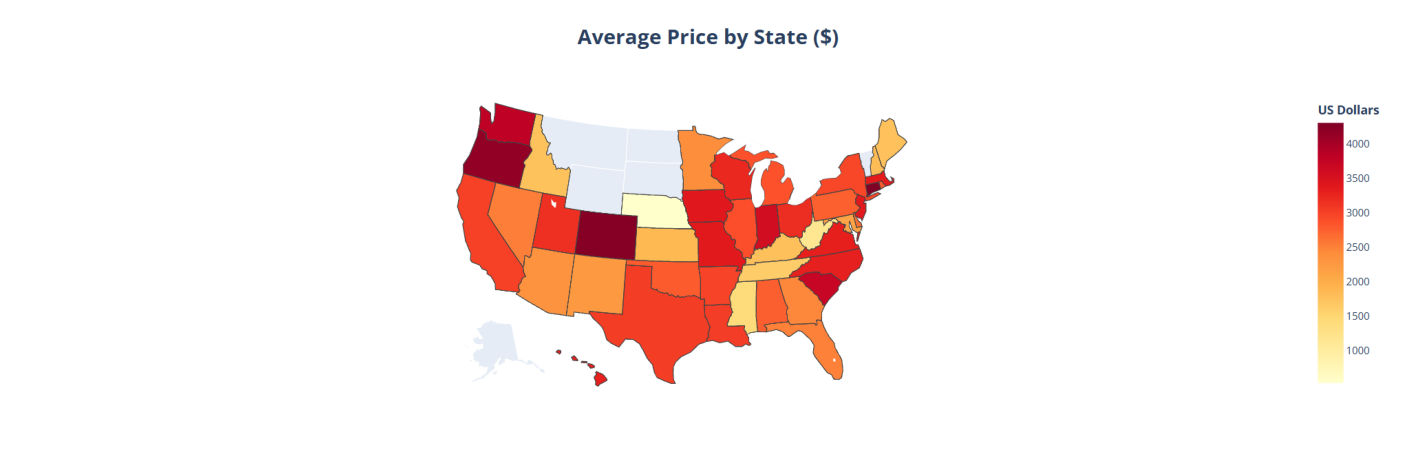

In [51]:
img = mpimg.imread(r"./avg_price_by_state.png")
plt.figure(figsize=(18,22))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

I expected to observe clear patterns, however, the data appears to be more random than anticipated. The Midwestern states tend to have slightly higher average prices, while states around Alabama generally show lower prices. Next, let's examine the average mileage by state.

In [52]:
# Create map
# Define Hover text
text = map_df.apply(lambda row: f"State: {row['State']}<br>Average mileage: {row['Mileage']:,.0f} miles<br>Cars Sold: {row['Sample Count']:,.0f}", axis=1)
fig_price = map_graph(map_df, 'Mileage', '<b>Average Mileage by State<b>', '<b>Mileage<b>', text)
fig_price.show()

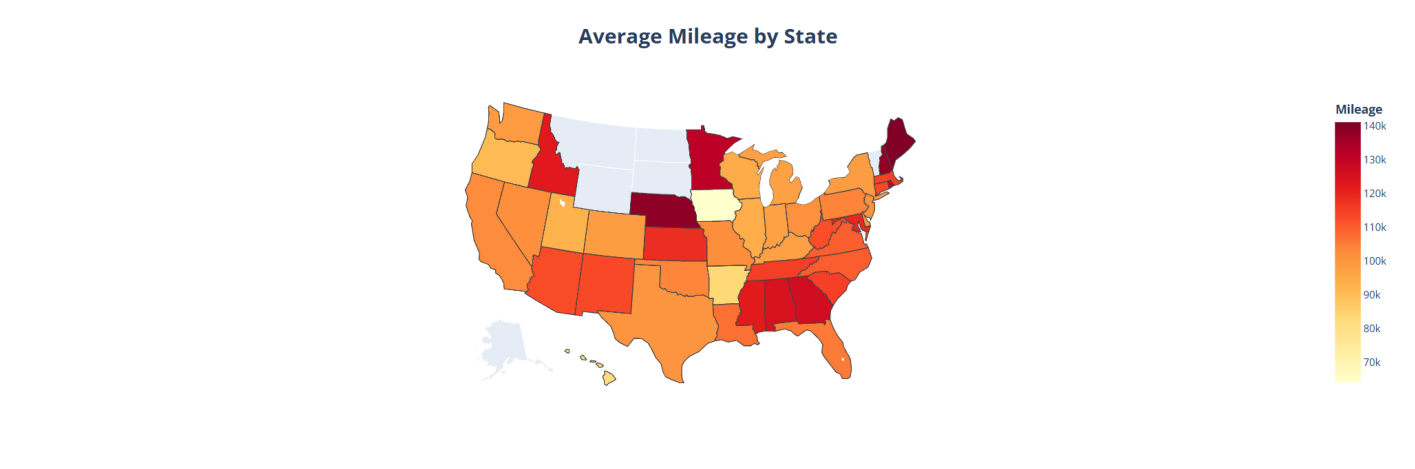

In [53]:
img = mpimg.imread(r"./avg_mileage_by_state.png")
plt.figure(figsize=(18,22))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

As observed, states around Alabama tend to have significantly higher mileage, which is likely contributing to the lower average prices in these regions. Finally, let’s create a map to visualize the average year by state.

In [54]:
# Create map
# Define Hover text
text = map_df.apply(lambda row: f"State: {row['State']}<br>Average year: {row['Year']:,.0f}<br>Cars Sold: {row['Sample Count']:,.0f}", axis=1)
fig_price = map_graph(map_df, 'Year', '<b>Average Year by State<b>', '<b>Year<b>', text)
fig_price.show()

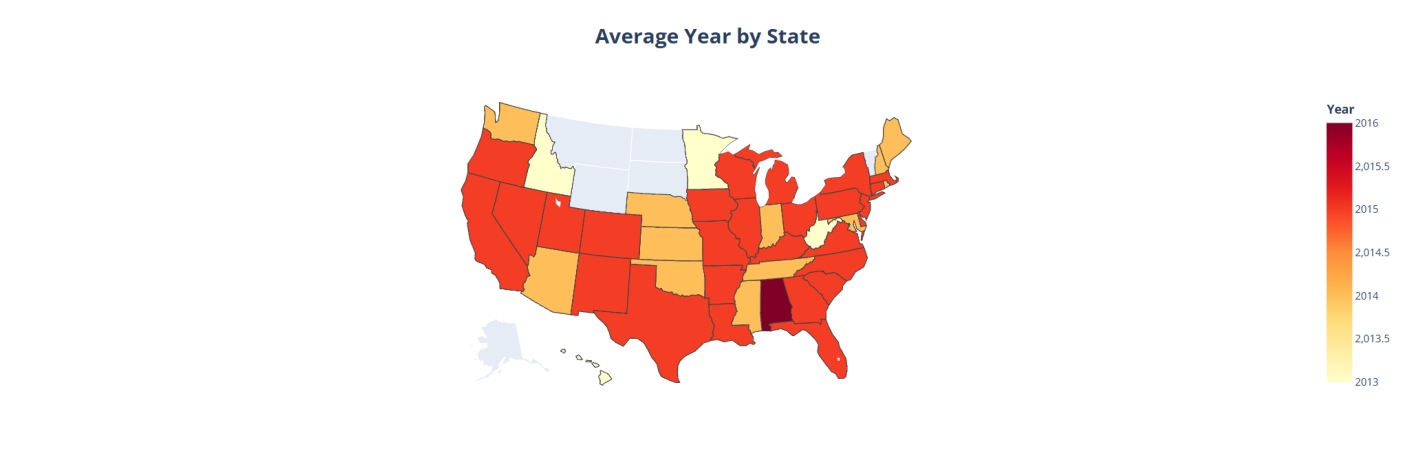

In [55]:
img = mpimg.imread(r"./avg_year_by_state.png")
plt.figure(figsize=(18,22))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

After reviewing the states across all three maps, I found that only Kentucky, Nevada, Florida, and Arizona stand out as relatively reliable. These states have consistent price-mileage data with minimal spread, indicating that the vehicles in these regions tend to follow a more predictable pattern. Additionally, the average year for vehicles in these states is 2015, which aligns with the average across most states. This stability in both pricing and vehicle age makes these states more reliable for further analysis and potential purchasing decisions.

Let's now apply some linear algebra to examine the broader relationship between price and mileage, and better understand the correlation between these two variables.

In [57]:
from sklearn.linear_model import LinearRegression
mask = (df['Mileage'] < 400000)
filtered_df = df[mask]
# Define X and Y
X = filtered_df[['Mileage']]
y = filtered_df['Price']

# Fit the model and predict prices
model = LinearRegression().fit(X, y)
filtered_df.loc[:, 'Predicted_Price'] = model.predict(X)

# Calculate residuals and standard deviation
filtered_df.loc[:, 'Residual'] = abs(filtered_df['Price'] - filtered_df['Predicted_Price'])
residual_std = filtered_df['Residual'].std()

# Calculate upper and lower thresholds for fair price range
filtered_df.loc[:, 'Upper_Threshold'] = filtered_df['Predicted_Price'] + residual_std
filtered_df.loc[:, 'Lower_Threshold'] = filtered_df['Predicted_Price'] - (residual_std * 1.5)

# Classify prices whether they fall within the fair price range
filtered_df.loc[:, 'Price_Fairness'] = filtered_df.apply(
    lambda row: 'Fair Price' if row['Lower_Threshold'] <= row['Price'] <= row['Upper_Threshold'] else 'Outlier Price',
    axis=1
)

<ipython-input-57-90bd4ffc66b6>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-90bd4ffc66b6>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-90bd4ffc66b6>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-57-90bd

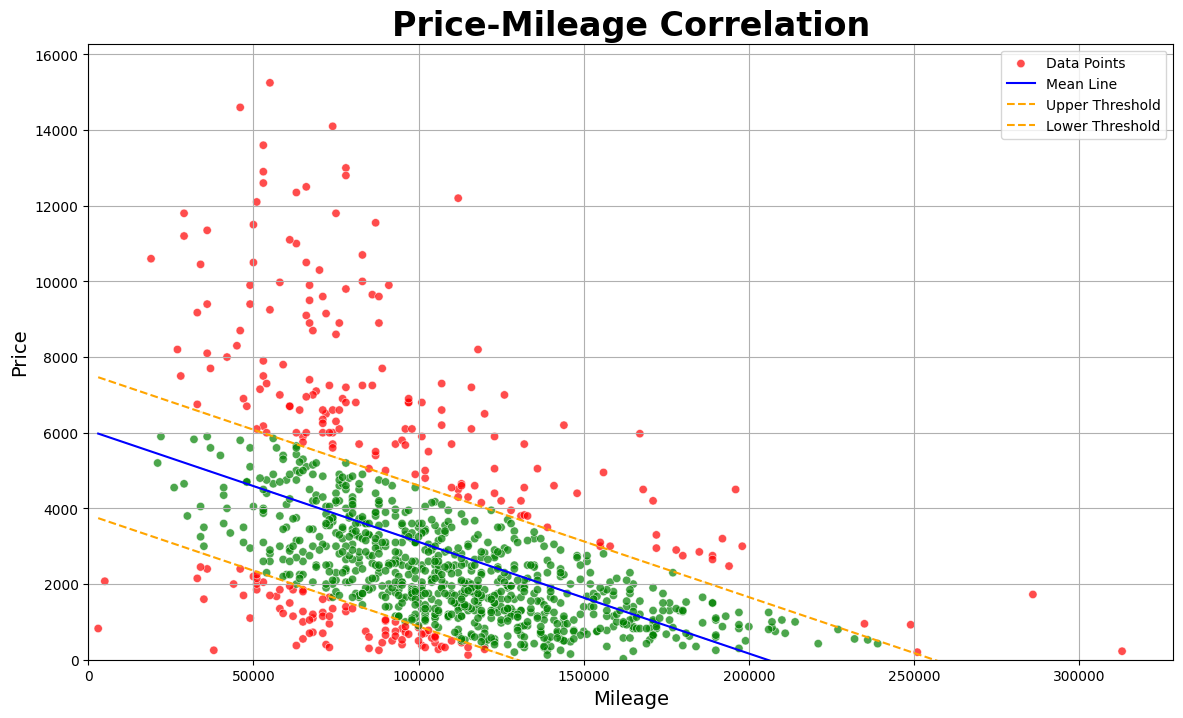

In [58]:
# Create Price-Mileage correlation graph
plt.figure(figsize=(14, 8))
colors = filtered_df['Price_Fairness'].map({'Fair Price': 'green', 'Outlier Price': 'red'})

# Plot all data points and lines
sns.scatterplot(data=filtered_df, x='Mileage', y='Price', c=colors, label='Data Points', alpha=0.7)
sns.lineplot(data=filtered_df, x='Mileage', y='Predicted_Price', color='blue', label='Mean Line')
sns.lineplot(data=filtered_df, x='Mileage', y='Upper_Threshold', linestyle='--', color='orange', label='Upper Threshold')
sns.lineplot(data=filtered_df, x='Mileage', y='Lower_Threshold', linestyle='--', color='orange', label='Lower Threshold')

# Add settings
plt.grid(True)
plt.xlim(0,None)
plt.ylim(0, None)
plt.title('Price-Mileage Correlation', fontsize=24, fontweight='bold', loc='center')
plt.xlabel('Mileage', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.show()

The green data points represent vehicles that fall within the fair price range. As observed, most of the data points fall within this range, indicating a positive outcome. However, there are some outliers, particularly for cars with mileage between 50,000 and 100,000 miles. Additionally, the trend line (predicted price) starts at approximately `$`6,000 and decreases by about `$`1,200 for every 50,000 miles, highlighting the relationship between mileage and price.

#### Best Day to Purchase a Vehicle

We have gained insights into the average price-mileage correlation and identified the most favorable states to consider when purchasing a vehicle. The next step is to explore whether there are any significant differences in vehicle prices depending on the day of the week. Are certain days more advantageous for buying a car, or does the data remain relatively consistent across all days? Let’s investigate further.

In [59]:
# Average sale price per day
df.groupby('Day of Sale')['Price'].mean().astype(int)

,Price
Day of Sale,
Fri,2473
Mon,2658
Sat,2491
Sun,2712
Thu,2880
Tue,2961
Wed,2912


Group the data by auction name and day to identify highest average price and its auction name for each day.

In [60]:
# Group by day and auction name and by the highest price
day_auction_mean_price = df.groupby(['Day of Sale', 'Auction Name'])['Price'].mean().astype(int)
highest_auction_day_price = day_auction_mean_price.groupby('Day of Sale').idxmax().reset_index()
highest_auction_day_price[['Day', 'Auction']] = highest_auction_day_price['Price'].apply(lambda x: pd.Series(x))
highest_auction_day_price['Price'] = highest_auction_day_price[['Day', 'Auction']].apply(lambda x: day_auction_mean_price.loc[tuple(x)], axis=1)
highest_auction_day_price = highest_auction_day_price[['Day of Sale', 'Auction', 'Price']]
# Order from Monday to Sunday
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
highest_auction_day_price = highest_auction_day_price.sort_values(by='Day of Sale', key=lambda x: pd.Categorical(x, categories=day_order, ordered=True))
highest_auction_day_price

,Day of Sale,Auction,Price
1,Mon,copart,2751
5,Tue,iaai,3113
6,Wed,copart,3191
4,Thu,iaai,3171
0,Fri,iaai,2932
2,Sat,copart,2683
3,Sun,copart,2743


Now, repeat the same, but with lowest average price.

In [61]:
# Group by day and auction name and by the lowest price
day_auction_mean_price = df.groupby(['Day of Sale', 'Auction Name'])['Price'].mean().astype(int)
lowest_auction_day_price = day_auction_mean_price.groupby('Day of Sale').idxmin().reset_index()
lowest_auction_day_price[['Day', 'Auction']] = lowest_auction_day_price['Price'].apply(lambda x: pd.Series(x))
lowest_auction_day_price['Price'] = lowest_auction_day_price[['Day', 'Auction']].apply(lambda x: day_auction_mean_price.loc[tuple(x)], axis=1)
lowest_auction_day_price = lowest_auction_day_price[['Day of Sale', 'Auction', 'Price']]
# Order from Monday to Sunday
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
lowest_auction_day_price = lowest_auction_day_price.sort_values(by='Day of Sale', key=lambda x: pd.Categorical(x, categories=day_order, ordered=True))
lowest_auction_day_price

,Day of Sale,Auction,Price
1,Mon,iaai,2446
5,Tue,copart,2851
6,Wed,iaai,2333
4,Thu,copart,2781
0,Fri,copart,2071
2,Sat,iaai,2395
3,Sun,iaai,2638


Graph results.

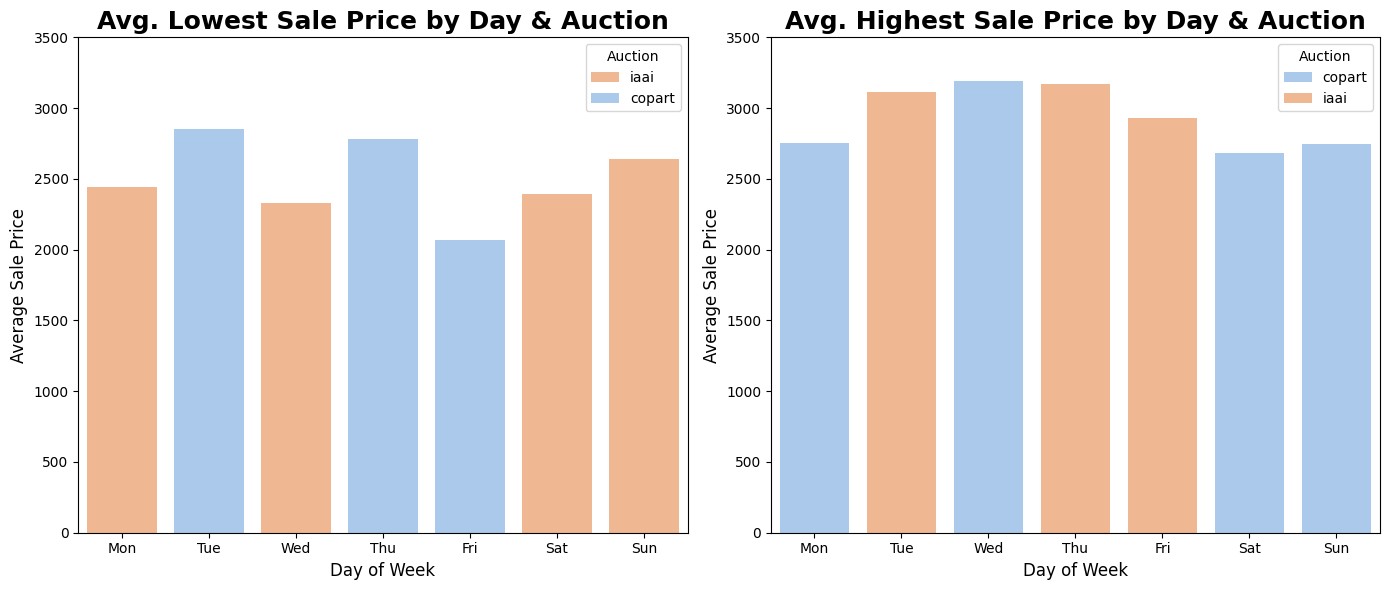

In [62]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
# Left graph
sns.barplot(lowest_auction_day_price, x='Day of Sale', y='Price', hue='Auction', palette=auction_color, ax=axes[0])
axes[0].set_ylim(0, 3500)
axes[0].set_title('Avg. Lowest Sale Price by Day & Auction', fontweight='bold', fontsize=18, loc='center')
axes[0].set_xlabel('Day of Week', fontsize=12)
axes[0].set_ylabel('Average Sale Price', fontsize=12)
# Right graph
sns.barplot(highest_auction_day_price, x='Day of Sale', y='Price', hue='Auction', palette=auction_color, ax=axes[1])
axes[1].set_ylim(0, 3500)
axes[1].set_title('Avg. Highest Sale Price by Day & Auction', fontweight='bold', fontsize=18, loc='center')
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Average Sale Price', fontsize=12)
plt.tight_layout()
plt.show()

As observed:
* Wesnesday, Friday - prices between auctions spread out, making one type of auction better and more preferable comparing to the other.
* Sunday - prices between two auctions are almost the same.
* Monday, Tuesday, Thursday, Saturday - prices between auctions vary, however in the moderate range.

Sunday is the optimal day to explore both auctions, as the prices for Copart and IAAI are nearly the same. On Wednesday and Friday you're more likely to find a desirable price in only one specific auction. On Monday, Tuesday, Thursday, and Saturday, the prices vary moderately between the two auctions, so it's a matter of identifying the best deal.

#### Auction Bidding vs. Buy Now Option

Okay, we clearly defined what days are he best for which auction sites. What about auction types? Buy Now or Auction, what's betterto consider?

Now that we've clearly identified the best days for each auction site, it's important to evaluate the auction types. Should we focus more on the "Buy Now" option or participate in the traditional auction? Which one offers the better deal? Let's explore the differences and determine the most advantageous approach.

<Figure size 1400x800 with 0 Axes>

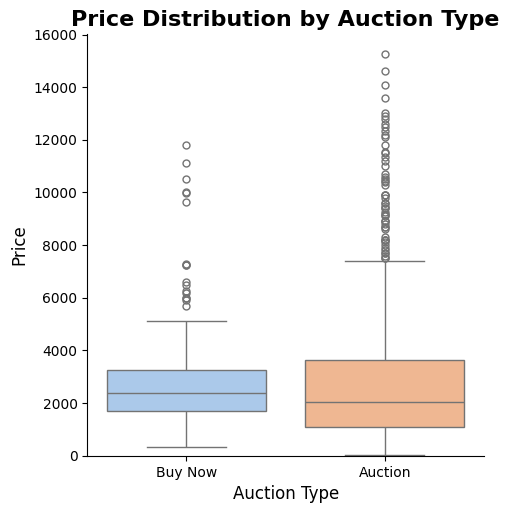

In [63]:
# Categorical plot Bidding vs. Auction
plt.figure(figsize=(14, 8))
sns.catplot(df, x='Auction Type', y='Price', kind='box', hue = 'Auction Type', palette='pastel')
plt.ylim(0, None)
plt.title('Price Distribution by Auction Type', fontsize=16, fontweight='bold')
plt.xlabel('Auction Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

Notice, that Interquartile Range for auction is wider, which indicates that auction prices fluctuate more widely compared to 'Buy Now' prices. Both categories have outliers, but auction category has much more. Another point, is that whiskers for auction category are higher, meaning greater variability in auction-based sales.
Some key takeaways:
* Buy Now seems to look more stable and predictable, with fewer outliers, however offering less variability.
* Auction prices show more variability, and can fluctuate significantly.
* Buy Now median leans slightly higher, possibly reflecting consistent pricing.

Obvious conclusion is that Buy Now method may appeal to buyers who prioritize certainty over potential savings, while Auction may attract those willing to take on more price volatility for the chance to get better deal.

#### Condition vs. Mileage Correlation

Initially, this may appear to be straightforward: more mileage equal worse condition. However, if we approach it from a different angle and consider whether higher mileage typically indicates that a car is not in 'Run and Drive' condition, things start to get more complex. This is where the analysis becomes crucial. As data analysts, we rely on data-driven insights, and there’s no uncertainty—by running the appropriate analysis, we can uncover the exact numbers.

In [64]:
df['Condition'].unique()

array(['Run and Drive', 'Stationary', 'No information', 'Starts'],
      dtype=object)

We have four different conditions here: Run and Drive, Stationary, Starts, and our least favorable, No Information.

In [65]:
condition_year_mileage_df = df.groupby(['Condition', 'Year'])[['Mileage', 'Price']].mean().reset_index()

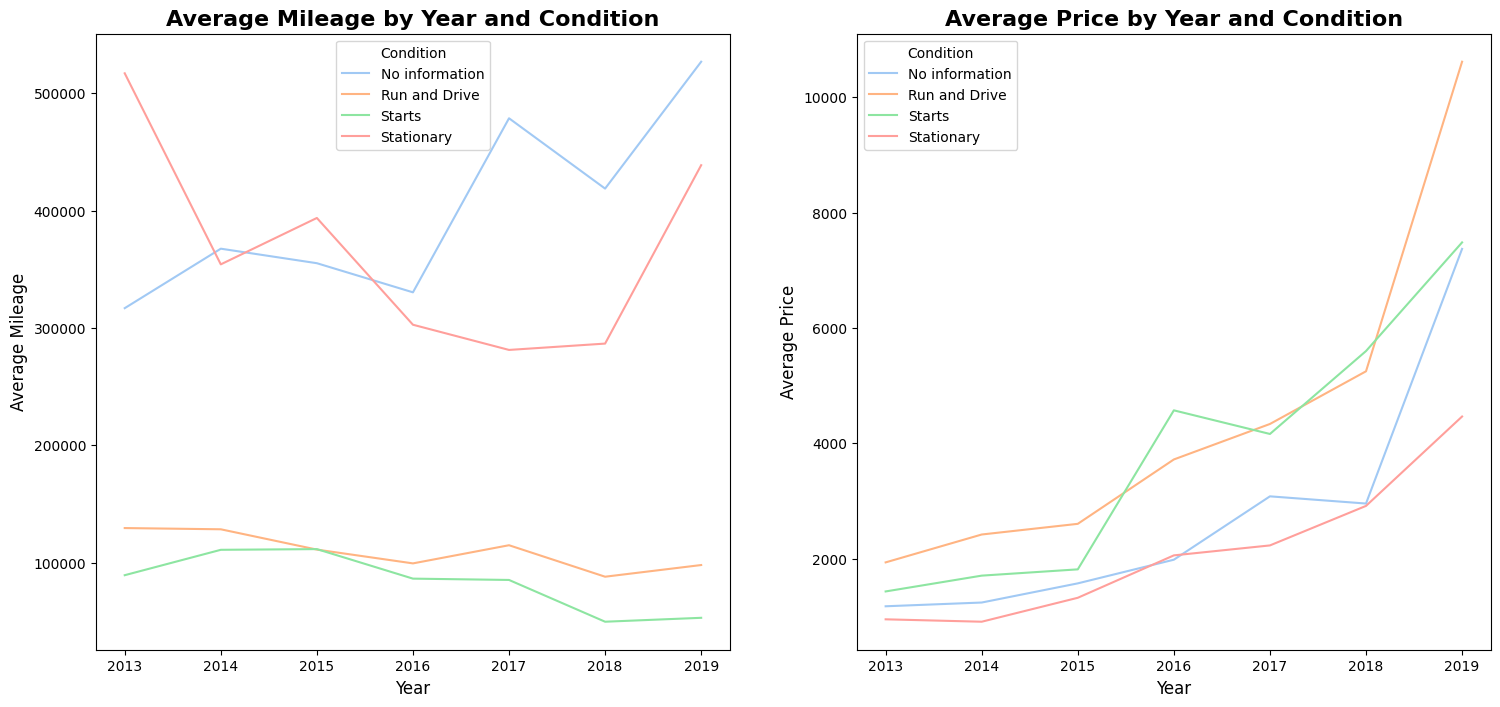

In [66]:
# Plot two graphs
fig, axes = plt.subplots(1,2, figsize=(18,8))
sns.lineplot(condition_year_mileage_df, x='Year', y='Mileage', hue='Condition', palette='pastel', ax=axes[0])
axes[0].set_title('Average Mileage by Year and Condition', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Average Mileage', fontsize=12)
sns.lineplot(condition_year_mileage_df, x='Year', y='Price', hue='Condition', palette='pastel', ax=axes[1])
axes[1].set_title('Average Price by Year and Condition', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Average Price', fontsize=12)
plt.show()

The vehicles with condition of 'No Information' and 'Stationary' tend to have higher mileage, but that would be due to some vehicles having broken odometer which shows 999,999 miles. Same works for Average price, 'No Information' and 'Stationary' are a bit cheaper, but not too much.

In [67]:
# Group by year and condition and size
year_condition_count_perc = df.groupby(['Year', 'Condition']).size()
year_condition_count_perc = (year_condition_count_perc / len(df) * 100).round(2).reset_index()
year_condition_count_perc = year_condition_count_perc.rename(columns={0:'Percentage'})

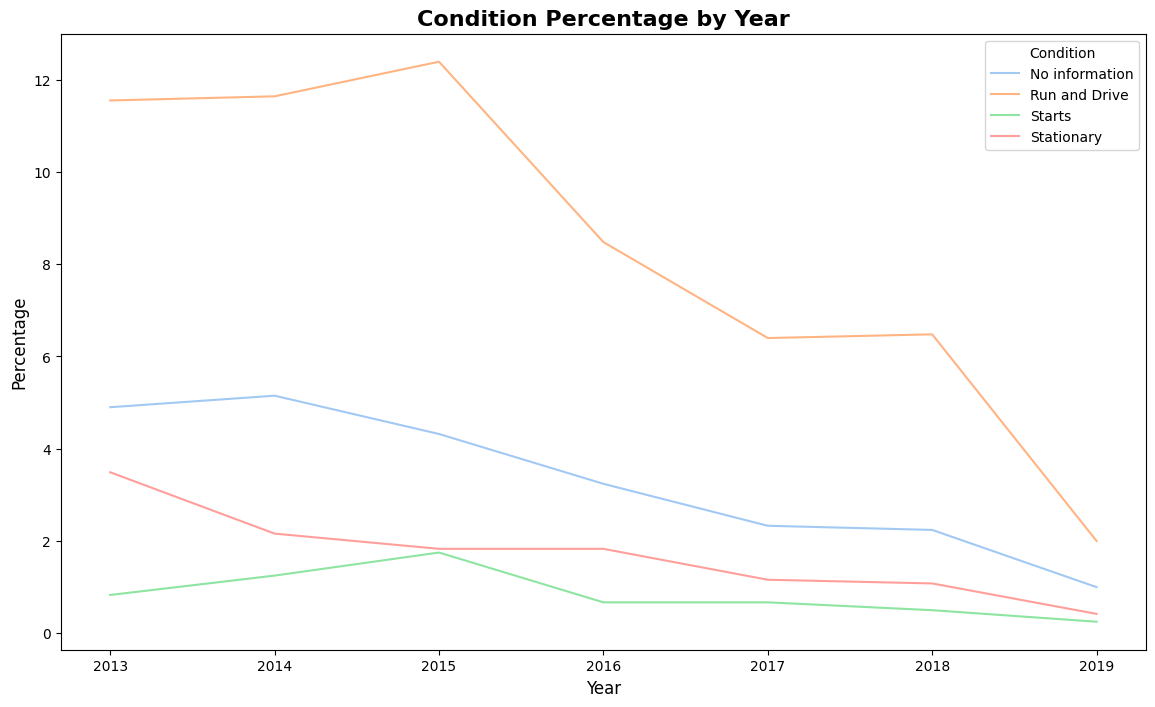

In [68]:
# Plot the data
fig= plt.figure(figsize=(14,8))
sns.lineplot(year_condition_count_perc, x='Year', y='Percentage', hue='Condition', palette='pastel')
plt.title('Condition Percentage by Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.show()

It appears that most of the vehicles in the dataset are in "Run and Drive" condition. Additionally, the graph shows that a significant portion of these vehicles are from the 2015 model year, suggesting that this year might be a dominant factor for vehicles in good condition. This could indicate that vehicles from this year are more likely to be in better shape or have been well-maintained, aligning with the trend of "Run and Drive" status.

Does the percentage of "Run and Drive" vehicles decrease as mileage increases?

<ipython-input-69-93359c6d4100>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



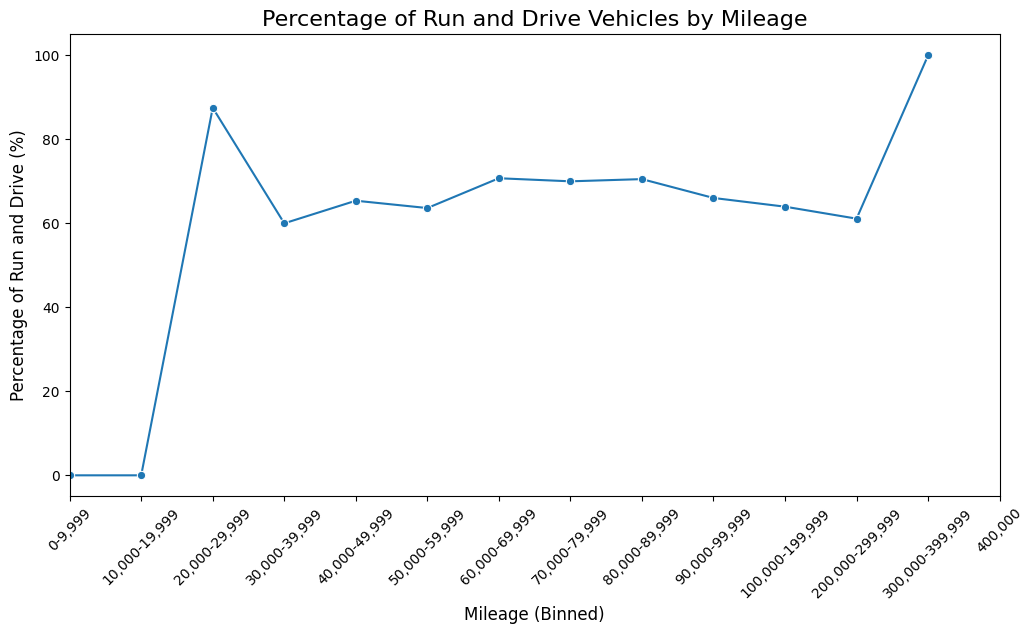

In [69]:
# Define bins
bins = [0, 9999, 19999, 29999, 39999, 49999, 59999, 69999, 79999, 89999, 99999, 199999, 299999, 399999, 400000]
labels = ['0-9,999', '10,000-19,999', '20,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999',
          '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-199,999', '200,000-299,999',
          '300,000-399,999', '400,000']

df['Mileage_Binned'] = pd.cut(df['Mileage'], bins=bins, labels=labels, right=False)

# Group by binned mileage and condition, find percentage of Run and Drive
mileage_condition_pct = df.groupby(['Mileage_Binned', 'Condition']).size().unstack(fill_value=0)
mileage_condition_pct = mileage_condition_pct.div(mileage_condition_pct.sum(axis=1), axis=0) * 100

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=mileage_condition_pct['Run and Drive'], marker='o')
plt.title('Percentage of Run and Drive Vehicles by Mileage', fontsize=16)
plt.xlabel('Mileage (Binned)', fontsize=12)
plt.ylabel('Percentage of Run and Drive (%)', fontsize=12)
plt.xticks(rotation=45)
plt.xlim(0, 13)
plt.show()


Overall, the percentage of "Run and Drive" vehicles remains consistent across the graph, suggesting that mileage doesn't significantly impact whether a vehicle is in "Run and Drive" condition or not.

#### Collision Location vs. Price

Next section: Are cars with front collisions cheaper than cars with back/side collisions? What condition are cars with the cheapest-priced collision type typically in?

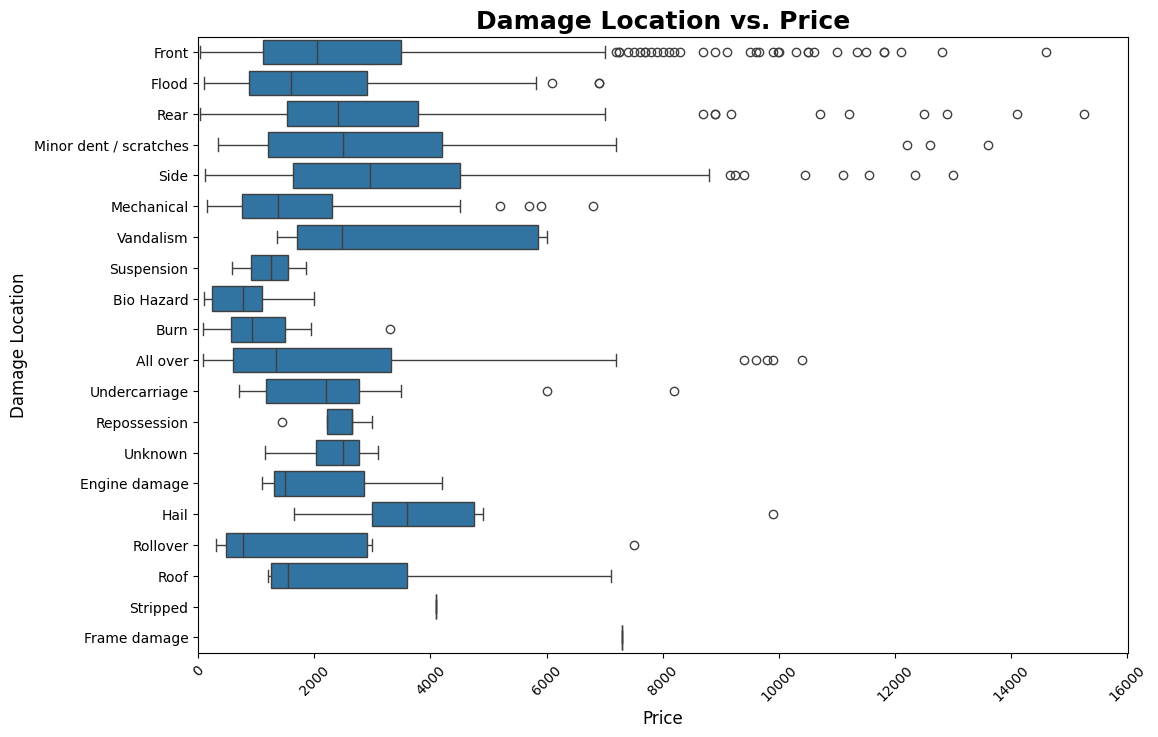

In [70]:
# Plot the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Damage Location', x='Price')
plt.title('Damage Location vs. Price', fontsize=18, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Damage Location', fontsize=12)
plt.xlim(0, None)
plt.xticks(rotation=45)
plt.show()

**Front Damage:**
* Typical range is 1,000 - 3,500, with many outliers that exceeds $7,000.
* Wide price range possibly due to severity of the damage.
* Highest amount of outliers.

**Flood, Mechanical:**
* Median price around $1,500.
* Mechanical damage has lower right whisker(edges of the plot), but outliers go as high as `$`7,000 for both, mechanical and flood damage.

**Rear Damage:**
* Median price for rear damage is higher than in front damage, however most of the values lay in the same range.
* Less outliers leading to more predictable price.

**Minor dent / scratches:**
* Higher median than in previous two cases, but again, most of the values lay in very close range as in previous cases.
* Would be better choice comparing to rear damage as chances of getting similar price is high.

**Side Damage:**
* Second highest median value.
* Prices are wide-spread making it harder to predict the car's value.

**Vandalism:**
* Prices are grouped well together (Interquartile range or 'blue box'), no outliers.
* After median $2,500, prices are less predictable and can range to around `$`6,200.  

**All over, Roof:**
* Most of the values fall under $3,500.

**Undercarriage, Engine Damage, Rollover:**  
* 75% of values are under $3,000.
* Engine damage has significantly lower median price, however most of the cars fall in the same range price for engine damage and undercarriage.

**Hail:**
* Highest median price.
* Price range between $3,000 - `$`5,000.

**Flood** and **mechanical** damages are not the best options to look at by their nature. BMWs tend to not be very friendly with flood damages, but of course it depends on water level. Mechanical damage can have a lot of different surprises which is probably not the best option to consider when purchasing car, unless you are mechanic or have a lot of spare parts from other BMWs.
Another mechanical damage can be **undercarriage**, **engine damage**. They can be very cheap or very expensive, and it's more like playing roulette. Of course, based on the mileage you can have slightly better chances to predict the damage, however it doesn't always work.

**Front damage** is the most popular, but since front damage may vary a lot, starting from just little fender damage, or something not critical, and all the way to broken bumper, hood, headlights, etc. If we would like to consider car with not significant front damage, the price would be `$`2,500 and up. **Rear damage** has similar range for most of the cars, however after spending quite a bit time on auctions I noticed, that rear damages are usually worse than front, and this due to the fact, that rear has more frame parts. Another interesting fact, cars with rear damage usually are more damaged after collision than cars with front damage.

Problem with **vandalism** damage, is that it can vary even more than front damage. This can be everything, starting from just teared seats, keyed car, and to damage all over the car in different places inside or outside. Median price is higher than for front damage and very similar to minor dents and scratches(also includes normal wear cars). Same applies for **all over** and **roof** and **rollover** damages. While median price may not be as high, but it's most likely damage to the car's frame which is expensive to repair.

When trying to predict **side damage**, I would not put such high price range for it, especially with median price around `$`3,000. However, it seems like side damage is not the best option to buy, as getting vehicle with just minor dents falls in the lower price range. Speaking of **minor dents/scratches**, it even looks like a better option comparing with rear damage, not as big of a difference, but the repair cost would be lower(repainting is not necessary). Most vehicles falls under similar price range as for front and rear damage, but it is less of a stress. Very little amount of outliers makes it easier to predict the price. $4,000 can be ideal price for the car with a little amount of dents.


#### Seller Type vs. Average Prices and Vehicle Conditions

Each insurance company and non-insurance seller may have differences in their listing prices, so it could be useful to analyze which companies offer the best deals to consider.

In [71]:
seller_condition_price = df.groupby(['Seller', 'Condition'])['Price'].mean().round(2).sort_values(ascending=False).reset_index()
# Create sample count for each seller
sample_counts = df[mask].groupby('Seller').size().reset_index(name='Sample Count')
seller_condition_price = seller_condition_price.merge(sample_counts, on='Seller')

In [72]:
seller_condition_price

,Seller,Condition,Price,Sample Count
0,ACSC,Run and Drive,4740.00,8
1,USAA,Run and Drive,4268.86,81
2,Farmers Insurance,Run and Drive,4050.00,13
3,Progressive,Starts,3947.70,162
4,Progressive,Run and Drive,3701.46,162
5,Erie,Run and Drive,3693.75,5
6,Geico,Run and Drive,3491.05,128
7,New Jersey Manufacturing Group,Run and Drive,3441.67,4
8,State Farm,Run and Drive,3200.00,151
9,Other company,Run and Drive,3178.54,300


In [73]:
# Create note with total samples per seller
sample_counts = df[mask].groupby('Seller').size().reset_index(name='Sample Count')
note = "\n".join([f"{row['Seller']}: {row['Sample Count']} samples" for index, row in sample_counts.iterrows()])

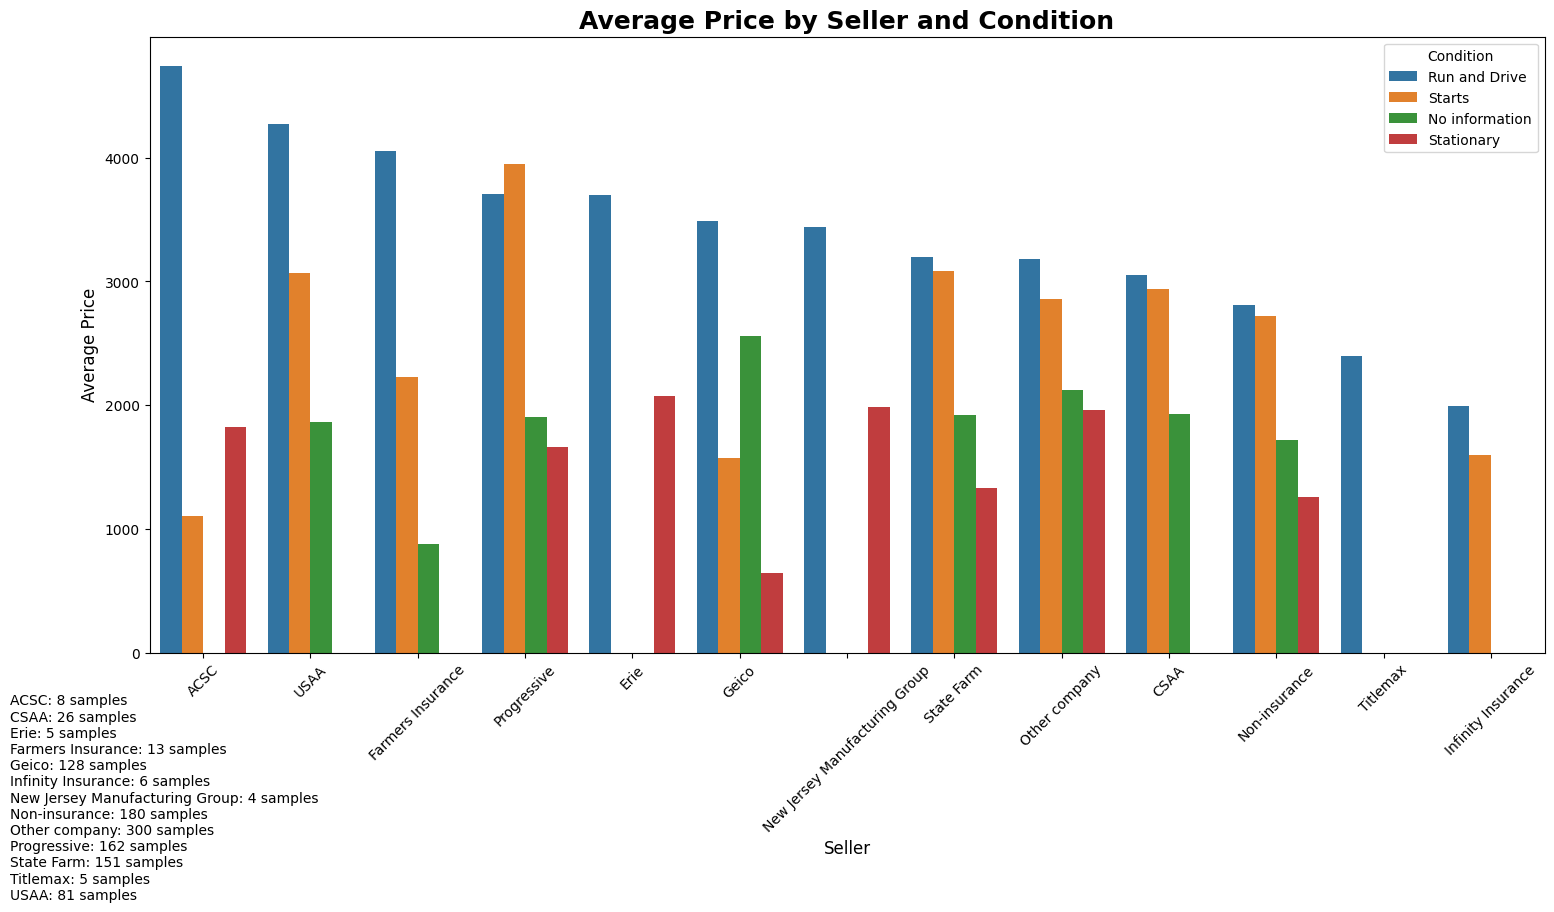

In [74]:
plt.figure(figsize=(18, 8))
sns.barplot(data=pd.DataFrame(seller_condition_price), x='Seller', y='Price', hue='Condition')
plt.xticks(rotation=45)
plt.title('Average Price by Seller and Condition', fontsize=18, fontweight='bold')
plt.xlabel('Seller', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.text(-0.1, -0.4, note, transform=plt.gca().transAxes) # x, y coordinates are in axes coordinates (0-1)
plt.show()

From left to right, starting with ACSC and ending with New Jersey Manufacturing Group, the average price for each vehicle condition is relatively high. However, Geico’s pricing for vehicles in the ‘Starts’ condition appears to be lower than expected, so it may be worth investigating further if you are interested in this particular condition.

State Farm, CSAA, and the 'Other Company' group offer some of the most competitively priced vehicles in the ‘Run and Drive’ and ‘Starts’ conditions. Notably, the price difference between vehicles in the ‘Run and Drive’ condition and those in the ‘Starts’ condition is minimal, making ‘Run and Drive’ vehicles a preferable option due to their higher reliability.

Vehicles from the Non-insurance category are priced lower than the groups mentioned before; however, this category presents higher risks, as there may be hidden issues with the vehicles. As such, we will not consider this category.

The companies positioned at the far right of the graph are companies that have sold few vehicles on the auction which makes their price more unstable. Despite this, it is highly suggested to take a look at cars from those companies, as their lower prices may reflect actual market conditions.

## Conclusion

This analysis encompassed a comprehensive evaluation of auctioned BMW vehicles, utilizing various visualizations and key insights to discover trends and optimal purchasing strategies. Some of the variables were not used, due to lack of information, some were not used due to the complexity of the analysis it could bring; however, the remaining dataset provided meaningful insights. For instance, Damage Type was omitted due to a high prevalence of “No Information” values, which would have compromised accuracy. Similarly, Trim was not incorporated, as it would have significantly reduced the sample size within each category, limiting the reliability of conclusions.

Key takeaways from the analysis include:

* **Optimal States for Purchase:** Kentucky, Nevada, Florida, and Arizona offer the most favorable conditions for purchasing auctioned vehicles, as they tend to have lower prices relative to mileage and a higher proportion of Run and Drive vehicles, particularly from model year 2015.

* **Vehicle Condition:** Among all conditions, Run and Drive is the most desirable, as it maintains a stable price-to-mileage ratio, dominates the dataset, and generally indicates fewer mechanical issues.

* **Best Days for Cost-Effective Purchases:** Sundays present the best opportunity to explore both major auctions, Copart and IAAI, as their pricing structures are nearly identical. On Wednesdays and Fridays, favorable deals may be found in only one of the auctions, while on other weekdays, the prices vary moderately between the two auctions, so it's a matter of identifying the best deal.

* **Auction Bidding vs. Buy Now Option:** The Buy Now option appeals to buyers who prioritize price certainty, while the Auction format is more suited for those willing to accept price fluctuations in pursuit of a better deal.

* **Impact of Damage Location on Pricing:** Damage location can be a significant factor in vehicle's price, but among all of the locations, dents/scratches and front damage are two the most reliable. Most of the cars come with front damage, however cars with normal wear (only has dents and scratches) usually have similar average price, making them a preferred option.

* **Insurance Provider Influence:** We already discussed that non-insurance is not the safest way, so we did not consider it in our analysis. The most favorable insurance providers, based on pricing and vehicle condition, include State Farm, CSAA, some minor insurance companies, and Geico (specifically for vehicles categorized as Starts).

From identifying the best states for vehicle purchases to pinpointing the most cost-effective auction days, we've established clear strategies for making informed decisions. Additionally, understanding the impact of vehicle condition, auction methods, and insurance providers has further refined our approach to evaluating auctioned cars.

Ultimately, buying a vehicle at auction involves balancing risks and rewards. By leveraging these insights, buyers can navigate the market more confidently, securing the best deals while minimizing uncertainties. Whether prioritizing affordability, reliability, or long-term value, our findings serve as a valuable guide for making the most out of BMW auctions.